# Supervised Machine Learning - Classification
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org
* W3Schools : www.w3schools.com/python

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

# Model Building Example

In [92]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns
from sklearn import tree

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

In [3]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

pd.read_csv(file_name, header=None)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Load CSV File
data = pd.read_csv(file_name, header=None)
data.columns = ['sepal length', 
                'sepal width',
                'petal length',
                'petal width',
                'class' ]
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal length,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal width,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
petal length,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
petal width,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
class,150,3,Iris-virginica,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64

In [6]:
class_names = data['class'].unique()
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data['y_act'] = data['class']
data['y_act'].replace('Iris-setosa', 0, inplace=True)
data['y_act'].replace('Iris-versicolor', 1, inplace=True)
data['y_act'].replace('Iris-virginica', 2, inplace=True)

data.sample(10)

,sepal length,sepal width,petal length,petal width,class,y_act
17,5.1,3.5,1.4,0.3,Iris-setosa,0
73,6.1,2.8,4.7,1.2,Iris-versicolor,1
123,6.3,2.7,4.9,1.8,Iris-virginica,2
143,6.8,3.2,5.9,2.3,Iris-virginica,2
50,7.0,3.2,4.7,1.4,Iris-versicolor,1
59,5.2,2.7,3.9,1.4,Iris-versicolor,1
5,5.4,3.9,1.7,0.4,Iris-setosa,0
95,5.7,3.0,4.2,1.2,Iris-versicolor,1
19,5.1,3.8,1.5,0.3,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0


In [8]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class',
       'y_act'],
      dtype='object')

,sepal length,sepal width,petal length,petal width,y_act
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
y_act,0.782561,-0.419446,0.949043,0.956464,1.000000


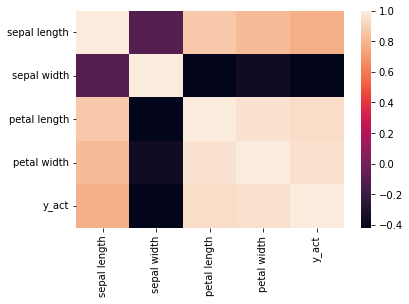

In [9]:
correlation_matrix = data[['sepal length', 'sepal width', 'petal length', 'petal width', 'y_act']].corr()

sns.heatmap(correlation_matrix)
correlation_matrix

## Identify `X` and `y`

In [11]:
X_variables = ['sepal length', 'sepal width', 'petal length', 'petal width']
data[X_variables].head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y_varibale = 'y_act'
data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

In [13]:
# Three classes
data[y_varibale].unique()

array([0, 1, 2])

In [19]:
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
X = data[X_variables].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [15]:
y = data[y_varibale].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 105
Test sample size  = 45


## Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [17]:
model = LogisticRegression()

## Fit Model

In [18]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict

In [20]:
class_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
model.predict_proba(X_test)

array([[4.08122470e-03, 8.12024102e-01, 1.83894673e-01],
       [9.42611546e-01, 5.73878795e-02, 5.74443402e-07],
       [1.53880890e-08, 2.09326319e-03, 9.97906721e-01],
       [6.75592393e-03, 7.73287346e-01, 2.19956730e-01],
       [1.58156609e-03, 7.51002514e-01, 2.47415920e-01],
       [9.50802759e-01, 4.91967881e-02, 4.52496458e-07],
       [7.75943595e-02, 9.04346488e-01, 1.80591522e-02],
       [1.75243717e-04, 1.47883607e-01, 8.51941149e-01],
       [2.42018693e-03, 7.80183978e-01, 2.17395835e-01],
       [2.90106483e-02, 9.40763088e-01, 3.02262638e-02],
       [4.62544059e-04, 2.25748825e-01, 7.73788631e-01],
       [9.63648286e-01, 3.63515343e-02, 1.80143788e-07],
       [9.69740161e-01, 3.02597444e-02, 9.50418886e-08],
       [9.57055618e-01, 4.29441223e-02, 2.60064172e-07],
       [9.76803433e-01, 2.31963793e-02, 1.87414455e-07],
       [4.68396202e-03, 6.63699907e-01, 3.31616131e-01],
       [9.41122227e-06, 2.67859157e-02, 9.73204673e-01],
       [2.78159456e-02, 9.44973

## Predicted Probability for Class 1

In [21]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.8120241 , 0.05738788, 0.00209326, 0.77328735, 0.75100251,
       0.04919679, 0.90434649, 0.14788361, 0.78018398, 0.94076309,
       0.22574883, 0.03635153, 0.03025974, 0.04294412, 0.02319638,
       0.66369991, 0.02678592, 0.94497392, 0.81999059, 0.04152859,
       0.0404545 , 0.38700439, 0.04309404, 0.05217392, 0.0204187 ,
       0.10581031, 0.06976056, 0.01955158, 0.0381735 , 0.04944626,
       0.00667656, 0.01925304, 0.89006219, 0.03471397, 0.0170235 ,
       0.28535119, 0.81233947, 0.03524733, 0.02153775, 0.01673907,
       0.19419243, 0.73753943, 0.75172523, 0.01806303, 0.03288184])

In [22]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

## Create Results Data Frame for Test Sample

In [24]:
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
test_result.sample(10)

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2
38,0,0,0.978462,0.021538,1.134522e-07
12,0,0,0.969740,0.030260,9.504189e-08
21,2,2,0.001405,0.387004,6.115906e-01
20,0,0,0.959545,0.040455,4.455789e-07
3,1,1,0.006756,0.773287,2.199567e-01
28,0,0,0.961826,0.038173,3.053356e-07
14,0,0,0.976803,0.023196,1.874145e-07
27,2,2,0.000005,0.019552,9.804431e-01
17,1,1,0.027816,0.944974,2.721014e-02
43,0,0,0.981937,0.018063,9.195929e-08


## Confusion Matrix

In [25]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,19,0,0,19
1,0,13,0,13
2,0,0,13,13
All,19,13,13,45


In [27]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1] + cfm.loc[2,2]) / cfm.loc['All','All'] 
acuracy

1.0

# Decision Tree Classifier

In [32]:
model = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=2)

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

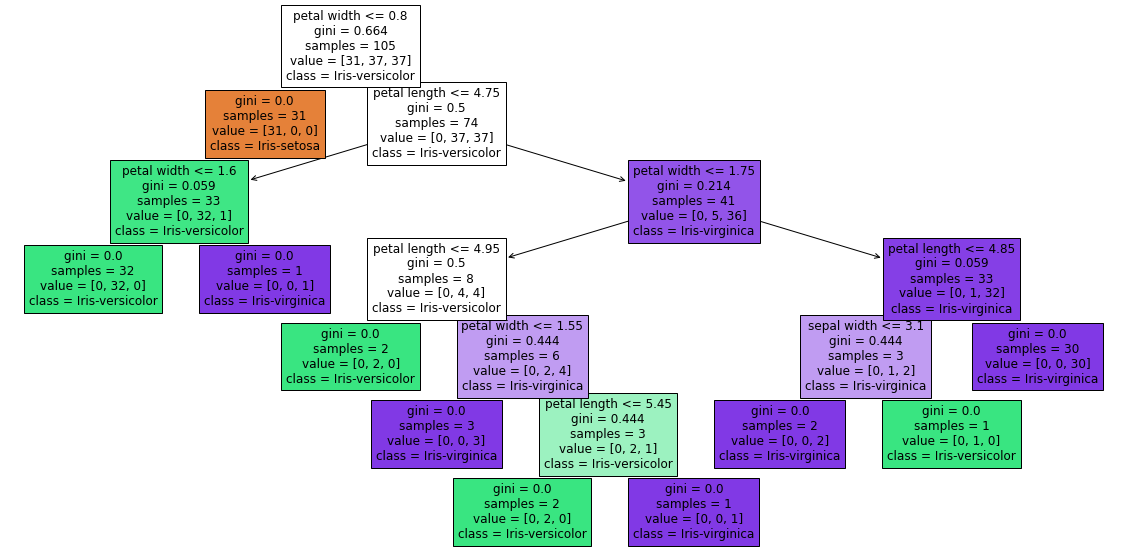

In [34]:
pfig = plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X_variables, class_names=class_names, filled=True)
plt.show()

In [35]:
model.predict_proba(X_test)

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [36]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [38]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
39,0,0,0.0
21,2,2,0.0
12,0,0,0.0
23,2,2,0.0
26,2,2,0.0
43,0,0,0.0
8,1,1,1.0
41,1,1,1.0
29,0,0,0.0
14,0,0,0.0


In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,19,0,0,19
1,0,13,0,13
2,0,0,13,13
All,19,13,13,45


In [ ]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1] ) / cfm.loc['All','All'] 
acuracy

0.7111111111111111

In [ ]:
precision = (cfm.loc[1,1]) / cfm.loc['All',1] 
precision

1.0

# Random Forest Classifier
* https://en.wikipedia.org/wiki/Random_forest
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [45]:
file_name = 'https://raw.githubusercontent.com/SumuduTennakoon/MLFoundations/main/Datasets/income_data.csv'

# Load CSV File
data = pd.read_csv(file_name)
data.sample(20)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
23718,23733,35,Private,241998,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
34214,9396,35,Private,139364,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K.
20769,20778,31,Private,113364,Assoc-acdm,12,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,20.0,United-States,<=50K
14886,14891,26,Private,123384,Masters,14,Never-married,Other-service,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
19745,19754,32,Self-emp-inc,377836,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
2097,2097,56,Local-gov,160829,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0.0,0.0,46.0,United-States,<=50K
31195,6377,26,Private,104097,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K.
7254,7256,40,Private,135056,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,45.0,United-States,<=50K
22837,22852,19,Private,184710,Some-college,10,Never-married,Tech-support,Own-child,White,Male,0.0,0.0,30.0,United-States,<=50K
32447,7629,49,Private,187308,Some-college,10,Married-civ-spouse,Other-service,Other-relative,White,Male,0.0,0.0,35.0,United-States,<=50K.


In [46]:
data.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [47]:
data.dropna(how='any', axis=0, inplace=True)

In [51]:
data['class'].replace(' >50K.', ' >50K')
data['class'].replace(' <=50K.', ' <=50K')
data['y_act'] = np.where(data['class']==' >50K',1,0)

In [52]:
data[['class', 'y_act']].sample(10)

,class,y_act
24467,>50K,1
18831,<=50K,0
24817,<=50K,0
81,<=50K,0
34906,<=50K.,0
17322,<=50K,0
6705,<=50K,0
40301,<=50K.,0
25151,>50K.,0
15588,<=50K,0


In [53]:
data[['class', 'y_act']].value_counts()

class    y_act
 <=50K   0        18867
 <=50K.  0        12430
 >50K    1         5951
 >50K.   0         3846
dtype: int64

In [55]:
X_variables = ['age',  'hours_per_week', 'education_num']
data[X_variables].head()

,age,hours_per_week,education_num
0,39,40.0,13
1,50,13.0,13
2,38,40.0,9
3,53,40.0,7
4,28,40.0,13


In [56]:
y_varibale = 'y_act'
data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

In [57]:
X = data[X_variables].values
X

array([[39., 40., 13.],
       [50., 13., 13.],
       [38., 40.,  9.],
       ...,
       [38., 50., 13.],
       [44., 40., 13.],
       [35., 60., 13.]])

In [58]:
y = data[y_varibale].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 28765
Test sample size  = 12329


In [62]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
model.predict_proba(X_test)

array([[0.89183044, 0.10816956],
       [0.85769723, 0.14230277],
       [0.98504246, 0.01495754],
       ...,
       [0.93896889, 0.06103111],
       [0.62705517, 0.37294483],
       [0.66889048, 0.33110952]])

In [64]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [67]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
4270,0,0,0.012233
6412,0,0,0.032341
803,0,0,0.019000
4338,0,0,0.067772
7769,0,0,0.000000
10553,0,0,0.134358
5153,0,0,0.184176
9291,0,0,0.056933
2500,0,0,0.308996
3494,0,0,0.098352


In [68]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,10184,339,10523
1,1592,214,1806
All,11776,553,12329


In [70]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1] ) / cfm.loc['All','All'] 
acuracy

0.843377402871279

In [71]:
precision = (cfm.loc[1,1]) / cfm.loc['All',1] 
precision

0.38698010849909587

In [72]:
test_result['y_pred_prob']

0        0.108170
1        0.142303
2        0.014958
3        0.000000
4        0.032572
           ...   
12324    0.045752
12325    0.210597
12326    0.061031
12327    0.372945
12328    0.331110
Name: y_pred_prob, Length: 12329, dtype: float64

In [73]:
test_result['y_pred_prob'].value_counts(bins=10)

(-0.002, 0.1]    6740
(0.1, 0.2]       2460
(0.2, 0.3]       1136
(0.3, 0.4]        916
(0.4, 0.5]        524
(0.6, 0.7]        202
(0.5, 0.6]        175
(0.7, 0.8]         86
(0.8, 0.9]         47
(0.9, 1.0]         43
Name: y_pred_prob, dtype: int64

In [74]:
test_result['prob_bucket'] = pd.cut(test_result['y_pred_prob'], bins=10)
test_result['prob_bucket']

0           (0.1, 0.2]
1           (0.1, 0.2]
2        (-0.001, 0.1]
3        (-0.001, 0.1]
4        (-0.001, 0.1]
             ...      
12324    (-0.001, 0.1]
12325       (0.2, 0.3]
12326    (-0.001, 0.1]
12327       (0.3, 0.4]
12328       (0.3, 0.4]
Name: prob_bucket, Length: 12329, dtype: category
Categories (10, interval[float64]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] < ... <
                                     (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [75]:
#labels = [1,2,3,4,5,6,7,8,9,10 ]
test_result['q_bucket'] = pd.qcut(test_result['y_pred_prob'], q=10, duplicates='drop')
test_result['q_bucket']

0            (0.08, 0.124]
1           (0.124, 0.173]
2        (0.00842, 0.0356]
3        (-0.001, 0.00842]
4        (0.00842, 0.0356]
               ...        
12324       (0.0356, 0.08]
12325        (0.173, 0.25]
12326       (0.0356, 0.08]
12327        (0.25, 0.379]
12328        (0.25, 0.379]
Name: q_bucket, Length: 12329, dtype: category
Categories (8, interval[float64]): [(-0.001, 0.00842] < (0.00842, 0.0356] < (0.0356, 0.08] <
                                    (0.08, 0.124] < (0.124, 0.173] < (0.173, 0.25] < (0.25, 0.379] <
                                    (0.379, 1.0]]

In [76]:
test_result

,y_act,y_pred,y_pred_prob,prob_bucket,q_bucket
0,0,0,0.108170,"(0.1, 0.2]","(0.08, 0.124]"
1,0,0,0.142303,"(0.1, 0.2]","(0.124, 0.173]"
2,0,0,0.014958,"(-0.001, 0.1]","(0.00842, 0.0356]"
3,0,0,0.000000,"(-0.001, 0.1]","(-0.001, 0.00842]"
4,0,0,0.032572,"(-0.001, 0.1]","(0.00842, 0.0356]"
...,...,...,...,...,...
12324,1,0,0.045752,"(-0.001, 0.1]","(0.0356, 0.08]"
12325,0,0,0.210597,"(0.2, 0.3]","(0.173, 0.25]"
12326,0,0,0.061031,"(-0.001, 0.1]","(0.0356, 0.08]"
12327,0,0,0.372945,"(0.3, 0.4]","(0.25, 0.379]"


In [83]:
eval_table  = test_result.groupby(by='q_bucket').agg(
    count=pd.NamedAgg(column="q_bucket", aggfunc="count"),
    response_count=pd.NamedAgg(column="y_act", aggfunc="sum"),
    min_probability = pd.NamedAgg(column="y_pred_prob", aggfunc="min"),
    ).reset_index()

eval_table

,q_bucket,count,response_count,min_probability
0,"(-0.001, 0.00842]",3699,135,0.000000
1,"(0.00842, 0.0356]",1233,126,0.008426
2,"(0.0356, 0.08]",1233,155,0.035700
3,"(0.08, 0.124]",1269,163,0.080272
4,"(0.124, 0.173]",1196,217,0.124068
5,"(0.173, 0.25]",1233,243,0.172999
6,"(0.25, 0.379]",1236,330,0.249576
7,"(0.379, 1.0]",1230,437,0.379483


In [84]:
eval_table['precision'] = eval_table['response_count'] / eval_table['count'] 
eval_table

,q_bucket,count,response_count,min_probability,precision
0,"(-0.001, 0.00842]",3699,135,0.000000,0.036496
1,"(0.00842, 0.0356]",1233,126,0.008426,0.102190
2,"(0.0356, 0.08]",1233,155,0.035700,0.125710
3,"(0.08, 0.124]",1269,163,0.080272,0.128448
4,"(0.124, 0.173]",1196,217,0.124068,0.181438
5,"(0.173, 0.25]",1233,243,0.172999,0.197080
6,"(0.25, 0.379]",1236,330,0.249576,0.266990
7,"(0.379, 1.0]",1230,437,0.379483,0.355285


In [85]:
eval_table['response_fraction'] = eval_table['response_count'] / eval_table['response_count'].sum()
eval_table

,q_bucket,count,response_count,min_probability,precision,response_fraction
0,"(-0.001, 0.00842]",3699,135,0.000000,0.036496,0.074751
1,"(0.00842, 0.0356]",1233,126,0.008426,0.102190,0.069767
2,"(0.0356, 0.08]",1233,155,0.035700,0.125710,0.085825
3,"(0.08, 0.124]",1269,163,0.080272,0.128448,0.090255
4,"(0.124, 0.173]",1196,217,0.124068,0.181438,0.120155
5,"(0.173, 0.25]",1233,243,0.172999,0.197080,0.134551
6,"(0.25, 0.379]",1236,330,0.249576,0.266990,0.182724
7,"(0.379, 1.0]",1230,437,0.379483,0.355285,0.241971


In [86]:

eval_table = eval_table.sort_index(ascending=False)
eval_table

,q_bucket,count,response_count,min_probability,precision,response_fraction
7,"(0.379, 1.0]",1230,437,0.379483,0.355285,0.241971
6,"(0.25, 0.379]",1236,330,0.249576,0.266990,0.182724
5,"(0.173, 0.25]",1233,243,0.172999,0.197080,0.134551
4,"(0.124, 0.173]",1196,217,0.124068,0.181438,0.120155
3,"(0.08, 0.124]",1269,163,0.080272,0.128448,0.090255
2,"(0.0356, 0.08]",1233,155,0.035700,0.125710,0.085825
1,"(0.00842, 0.0356]",1233,126,0.008426,0.102190,0.069767
0,"(-0.001, 0.00842]",3699,135,0.000000,0.036496,0.074751


In [87]:
eval_table['cumulative_response_count'] = eval_table['response_count'].cumsum()
eval_table['cumulative_count'] = eval_table['count'].cumsum()
eval_table = eval_table.sort_index(ascending=True)
eval_table


,q_bucket,count,response_count,min_probability,precision,response_fraction,cumulative_response_count,cumulative_count
0,"(-0.001, 0.00842]",3699,135,0.000000,0.036496,0.074751,1806,12329
1,"(0.00842, 0.0356]",1233,126,0.008426,0.102190,0.069767,1671,8630
2,"(0.0356, 0.08]",1233,155,0.035700,0.125710,0.085825,1545,7397
3,"(0.08, 0.124]",1269,163,0.080272,0.128448,0.090255,1390,6164
4,"(0.124, 0.173]",1196,217,0.124068,0.181438,0.120155,1227,4895
5,"(0.173, 0.25]",1233,243,0.172999,0.197080,0.134551,1010,3699
6,"(0.25, 0.379]",1236,330,0.249576,0.266990,0.182724,767,2466
7,"(0.379, 1.0]",1230,437,0.379483,0.355285,0.241971,437,1230


In [88]:
eval_table['cumulative_precision'] = eval_table['cumulative_response_count']/eval_table['cumulative_count']
eval_table['cumulative_response_fraction'] = eval_table['cumulative_response_count'] / eval_table['response_count'].sum()
eval_table

,q_bucket,count,response_count,min_probability,precision,response_fraction,cumulative_response_count,cumulative_count,cumulative_precision,cumulative_response_fraction
0,"(-0.001, 0.00842]",3699,135,0.000000,0.036496,0.074751,1806,12329,0.146484,1.000000
1,"(0.00842, 0.0356]",1233,126,0.008426,0.102190,0.069767,1671,8630,0.193627,0.925249
2,"(0.0356, 0.08]",1233,155,0.035700,0.125710,0.085825,1545,7397,0.208868,0.855482
3,"(0.08, 0.124]",1269,163,0.080272,0.128448,0.090255,1390,6164,0.225503,0.769657
4,"(0.124, 0.173]",1196,217,0.124068,0.181438,0.120155,1227,4895,0.250664,0.679402
5,"(0.173, 0.25]",1233,243,0.172999,0.197080,0.134551,1010,3699,0.273047,0.559247
6,"(0.25, 0.379]",1236,330,0.249576,0.266990,0.182724,767,2466,0.311030,0.424695
7,"(0.379, 1.0]",1230,437,0.379483,0.355285,0.241971,437,1230,0.355285,0.241971


#  Receiver operating characteristic (ROC)

ROC AUC Score = 0.7269241693747042


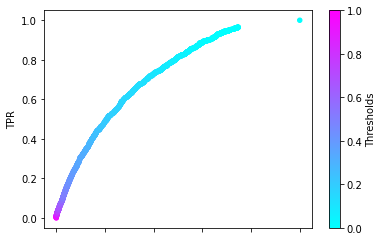

In [93]:
cmap = cm.get_cmap('cool') 

fpr, tpr, thresholds = metrics.roc_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)
roc = pd.DataFrame(data={'Thresholds':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
roc.plot(kind='scatter', x='FPR', y='TPR', c='Thresholds', cmap=cmap)

roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

print(F"ROC AUC Score = {roc_auc}")

# Precision Recall Curve (PRC)

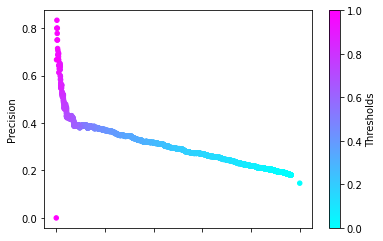

In [94]:
precision, recall, thresholds = metrics.precision_recall_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

prc = pd.DataFrame(data={'Thresholds':thresholds, 'Precision':precision[:-1], 'Recall':recall[:-1]})
prc.plot(kind='scatter', x='Recall', y='Precision', c='Thresholds', cmap=cmap)

# Support Vector Machines
* https://en.wikipedia.org/wiki/Support-vector_machine
* https://scikit-learn.org/stable/modules/svm.html

In [91]:
model = svm.SVC(kernel='linear', C=1.0, probability=True)

model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
11,0,0,0.037836
13,0,0,0.040455
3,1,1,0.897620
14,0,0,0.024572
37,0,0,0.031125
35,2,2,0.090346
22,0,0,0.048332
18,1,1,0.905286
42,1,1,0.937171
1,0,0,0.039553


ROC AUC Score = 0.6675429573715499


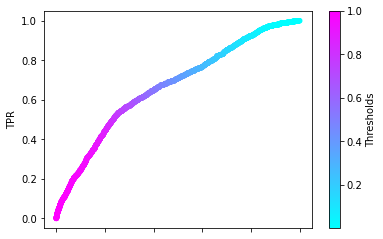

In [ ]:
cmap = cm.get_cmap('cool') 

fpr, tpr, thresholds = metrics.roc_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)
roc = pd.DataFrame(data={'Thresholds':thresholds[1:], 'FPR':fpr[1:], 'TPR':tpr[1:]})
roc.plot(kind='scatter', x='FPR', y='TPR', c='Thresholds', cmap=cmap)

roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

print(F"ROC AUC Score = {roc_auc}")

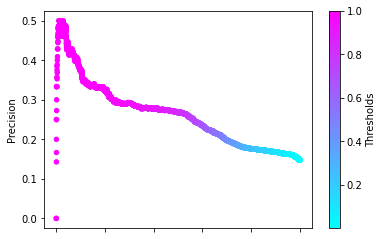

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(test_result['y_act'], test_result['y_pred_prob'], pos_label=1)

prc = pd.DataFrame(data={'Thresholds':thresholds, 'Precision':precision[:-1], 'Recall':recall[:-1]})
prc.plot(kind='scatter', x='Recall', y='Precision', c='Thresholds', cmap=cmap)

<hr>
Last update 2021-10-16 by Sumudu Tennakoon